- Q1. Do smokers have higher insurance charges than non-smokers?

- Q2. Are men more likely to smoke than women?

- Q3. Do different regions have different charges, on average?

For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis

Select the correct test according to the data type and number of samples

Test the assumptions of your selected test.

Execute the selected test, or the alternative test (if you do not meet the assumptions)

Interpret your p-value and reject or fail to reject your null hypothesis 

Show a supporting visualization that helps display the result

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
Id = pd.read_csv('insurance - insurance.csv')
Id.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# State the Hypothesis & Null Hypothesis

Null Hypothesis: Smokers and non-smokers will have same insurance charges.

Alternative Hypothesis: There is a significant difference in the insurance charges between the smokers and non-smokers. 

Since we are measuring a numeric value (charges) and we are comparing 2 groups/samples.

We therefore want to perform a 2-sample t-test, A.K.A. an independent t-test.

According the the work flow, the 2-sample T-Test has the following assumptions:

No significant outliers, Normality, Equal Variance

Q1. Do smokers have higher insurance charges than non-smokers?

In [5]:
#The next step is to get the data for each group in separate variables. Discounted and non-discounted
## save Smokers in a separate variable
smokers_df = Id.loc[ Id['smoker']=='yes']
smokers_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [6]:
## save non-smokers in a separate variable
non_smokers_df = Id.loc[ Id['smoker']=='no']
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [7]:
smokers = smokers_df[['smoker','charges']]
smokers

,smoker,charges
0,yes,16884.92400
11,yes,27808.72510
14,yes,39611.75770
19,yes,36837.46700
23,yes,37701.87680
...,...,...
1313,yes,36397.57600
1314,yes,18765.87545
1321,yes,28101.33305
1323,yes,43896.37630


In [8]:
non_smokers = non_smokers_df[['smoker','charges']]
non_smokers

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160
...,...,...
1332,no,11411.68500
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350


In [9]:
## Make a df just for visualization by concat the groups 
con_smokers = pd.concat([smokers,non_smokers])
con_smokers

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


<AxesSubplot:xlabel='smoker', ylabel='charges'>

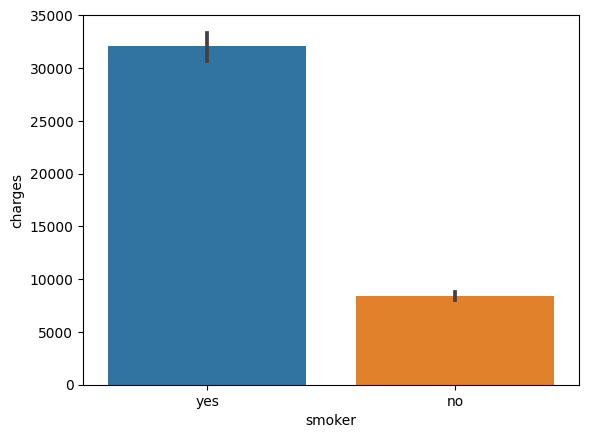

In [10]:
## visualize the group means
sns.barplot(data=con_smokers, x='smoker',y='charges')

# Testing Assumptions

No significant outliers

Normality

Equal Variance

In [11]:
#Checking Assumption of no significant outliers

## Saving JUST the numeric col as final group variables
smokers_group = smokers['charges']
non_smokers_group = non_smokers['charges']

In [12]:
## Check smokers group for outliers
smokers_group_outliers = np.abs(stats.zscore(smokers_group)) > 3
smokers_group_outliers.sum()

0

In [14]:
## Check non-smokers group for outliers
non_smokers_group_outliers = np.abs(stats.zscore(non_smokers_group)) > 3
non_smokers_group_outliers.sum()

24

In [15]:
## remove outliers from non_smokers_group
non_smokers_group = non_smokers_group.loc[~non_smokers_group_outliers]
non_smokers_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

# Test for Normality

In [16]:
## Check smokers_group group for normality
result = stats.normaltest(smokers_group)
result.pvalue

5.564930630036463e-14

In [20]:
## Check n for smokers_group group
len(smokers_group)

274

In [21]:
## Check non_smokers_group group for normality
result1 = stats.normaltest(non_smokers_group)
result1.pvalue

2.6945416315543976e-36

In [22]:
## Check n for non_smokers_group group
len(non_smokers_group)

1040

since both groups have n > 15, we can safely ignore the assumption of normality.

# Checking for Equal Variance

In [23]:
result2 = stats.levene(smokers_group, non_smokers_group)
print(result2)
print(result2.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


In [24]:
## Use an if-else to help interpret the p-value
if result2.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

# Statistical Test

In [27]:
result3 = stats.ttest_ind(smokers_group, non_smokers_group, equal_var=False)
print(result3)
result3.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

# Final Conclusion

Our Welch's T-Test return a p-value < .05. We reject the null hypothesis and support the alternative hypothesis that there is a significant difference in the insurance charges between the smokers and non-smokers.

In order to know if the difference is significantly MORE or LESS, we look at the actual means of our final groups.

In [28]:
print(f"The average quantity for disc_group was {smokers_group.mean():.2f}")
print(f"The average quantity for non_disc_group was {non_smokers_group.mean():.2f}")

The average quantity for disc_group was 32050.23
The average quantity for non_disc_group was 7939.86


Yes, smokers will have higher insurance charges than non-smokers.